### Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import gzip
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


### defining a function to show images

In [27]:
def showImage(data):
    some_article = data   # Selecting the image.
    some_article_image = some_article.reshape(28, 28)
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

### Loading Data

#### File Paths

In [28]:
filePath_train_set = 'dataset/train-images-idx3-ubyte.gz'
filePath_train_label = 'dataset/train-labels-idx1-ubyte.gz'
filePath_test_set = 'dataset/t10k-images-idx3-ubyte.gz'
filePath_test_label = 'dataset/t10k-labels-idx1-ubyte.gz'

#### opening gzip files

In [29]:
with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

#### Train Test Spliting

In [30]:
X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel

### Exploring Data

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(60000, 784)
(60000,)
(10000, 784)
(60000,)


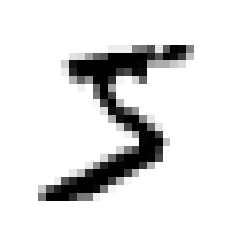

5

In [32]:
showImage(X_train[0])
y_train[0]

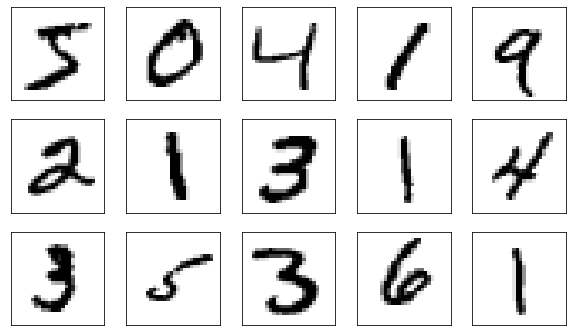

In [33]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    array_image = X_train[i].reshape(28, 28)
    plt.imshow(array_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.show()

### Shuffling the Data

In [34]:
np.random.seed(42)

In [35]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Adding Noise to data

In [36]:
import numpy.random as rnd

In [37]:
noise_train = rnd.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise_train
noise_test = rnd.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise_test
y_train_mod = X_train
y_test_mod = X_test

#### Viewing Noise Data

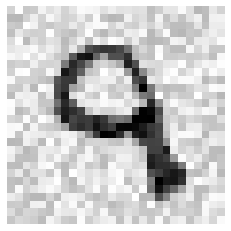

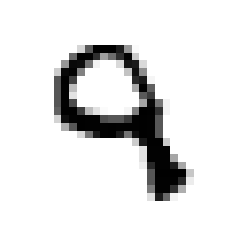

In [38]:
showImage(X_test_mod[4000])

showImage(y_test_mod[4000])

### Training a KNN-Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

### Predicting Noisy Image

In [41]:
clean_digit = knn_clf.predict([X_test_mod[5000]])

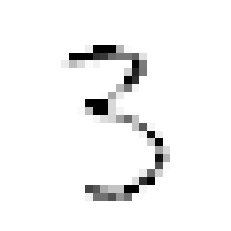

In [42]:
showImage(clean_digit)

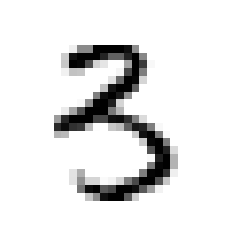

In [43]:
showImage(y_test_mod[5000])